In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Example: Generating random data to simulate electricity prices (replace with your actual data)
np.random.seed(42)
prices = np.random.rand(365, 48)

# Convert to DataFrame if needed
prices_df = pd.DataFrame(prices)


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
prices_scaled = scaler.fit_transform(prices_df)


In [3]:
from tensorflow.keras import layers, models

# Define the autoencoder architecture
input_dim = prices_scaled.shape[1]

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)  # Latent space

# Decoder
decoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(prices_scaled, prices_scaled, epochs=50, batch_size=16, shuffle=True)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - loss: 1.2456 
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 1.2281
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 1.1435
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 1.0148
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.0065
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.9949
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.9999
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.9989
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.9873
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.0011
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.9924
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.9868
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.9756
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.9818
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - l

In [4]:
# Extract the encoder part of the autoencoder
encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.layers[-4].output)

# Get the latent space representation
latent_features = encoder.predict(prices_scaled)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [32]:
from sklearn.cluster import KMeans

k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(latent_features)

# Add cluster labels to the DataFrame
prices_df['Cluster'] = clusters


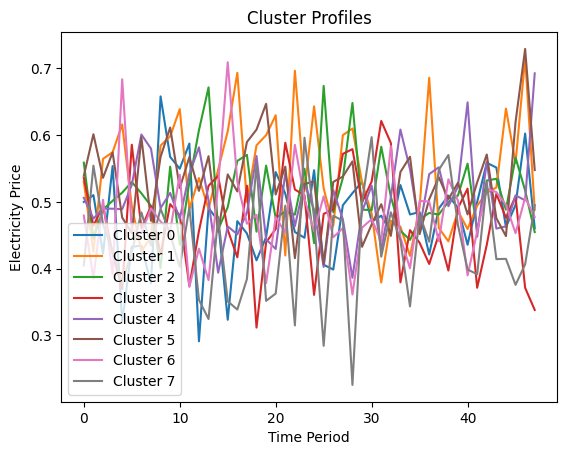

In [33]:
import matplotlib.pyplot as plt

# Plotting the cluster profiles
for i in range(k):
    cluster_data = prices_df[prices_df['Cluster'] == i].iloc[:, :-1]
    plt.plot(cluster_data.mean(axis=0), label=f'Cluster {i}')

plt.xlabel('Time Period')
plt.ylabel('Electricity Price')
plt.title('Cluster Profiles')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(latent_features, clusters)
print(f'Silhouette Score: {sil_score:.2f}')


Silhouette Score: 0.15
